In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Checking for duplicates in data
sum(df.duplicated())

1081

In [9]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Removing columns which are not meaningful such as 'time' column
df.drop(['Time'], axis=1, inplace=True)

In [11]:
# Separating the data into target column and feature columns 
X = df.iloc[:, df.columns != 'Class']
y = df.Class

In [12]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [14]:
# Data is scaled to make the model more robust
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# This completes the preprocessing of the data

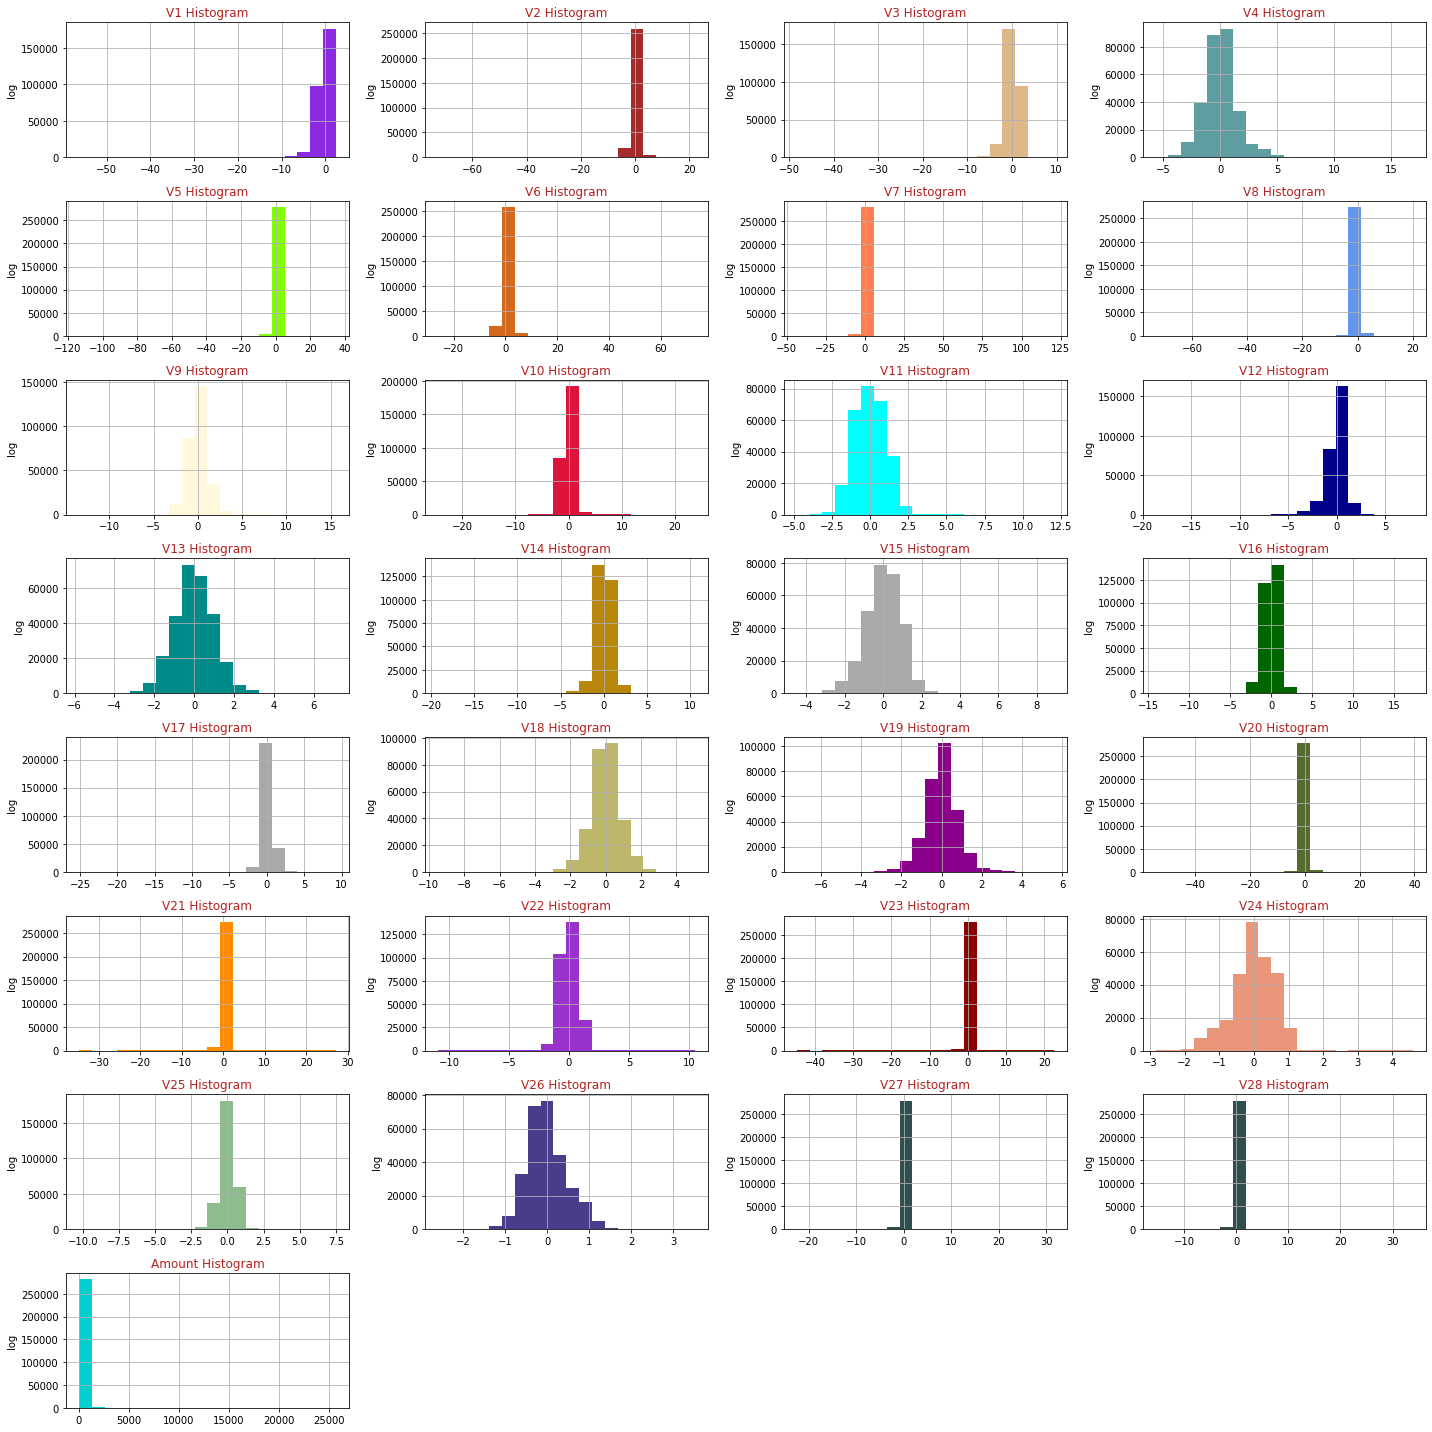

In [15]:
# Data visualization
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histogram(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor=colors[i])
        ax.set_title(feature+" Histogram", color = colors[35])       
        ax.set_ylabel('log')
    fig.tight_layout()
    plt.savefig('histogram.png')
    plt.show()

draw_histogram(df, X.columns, 8, 4)

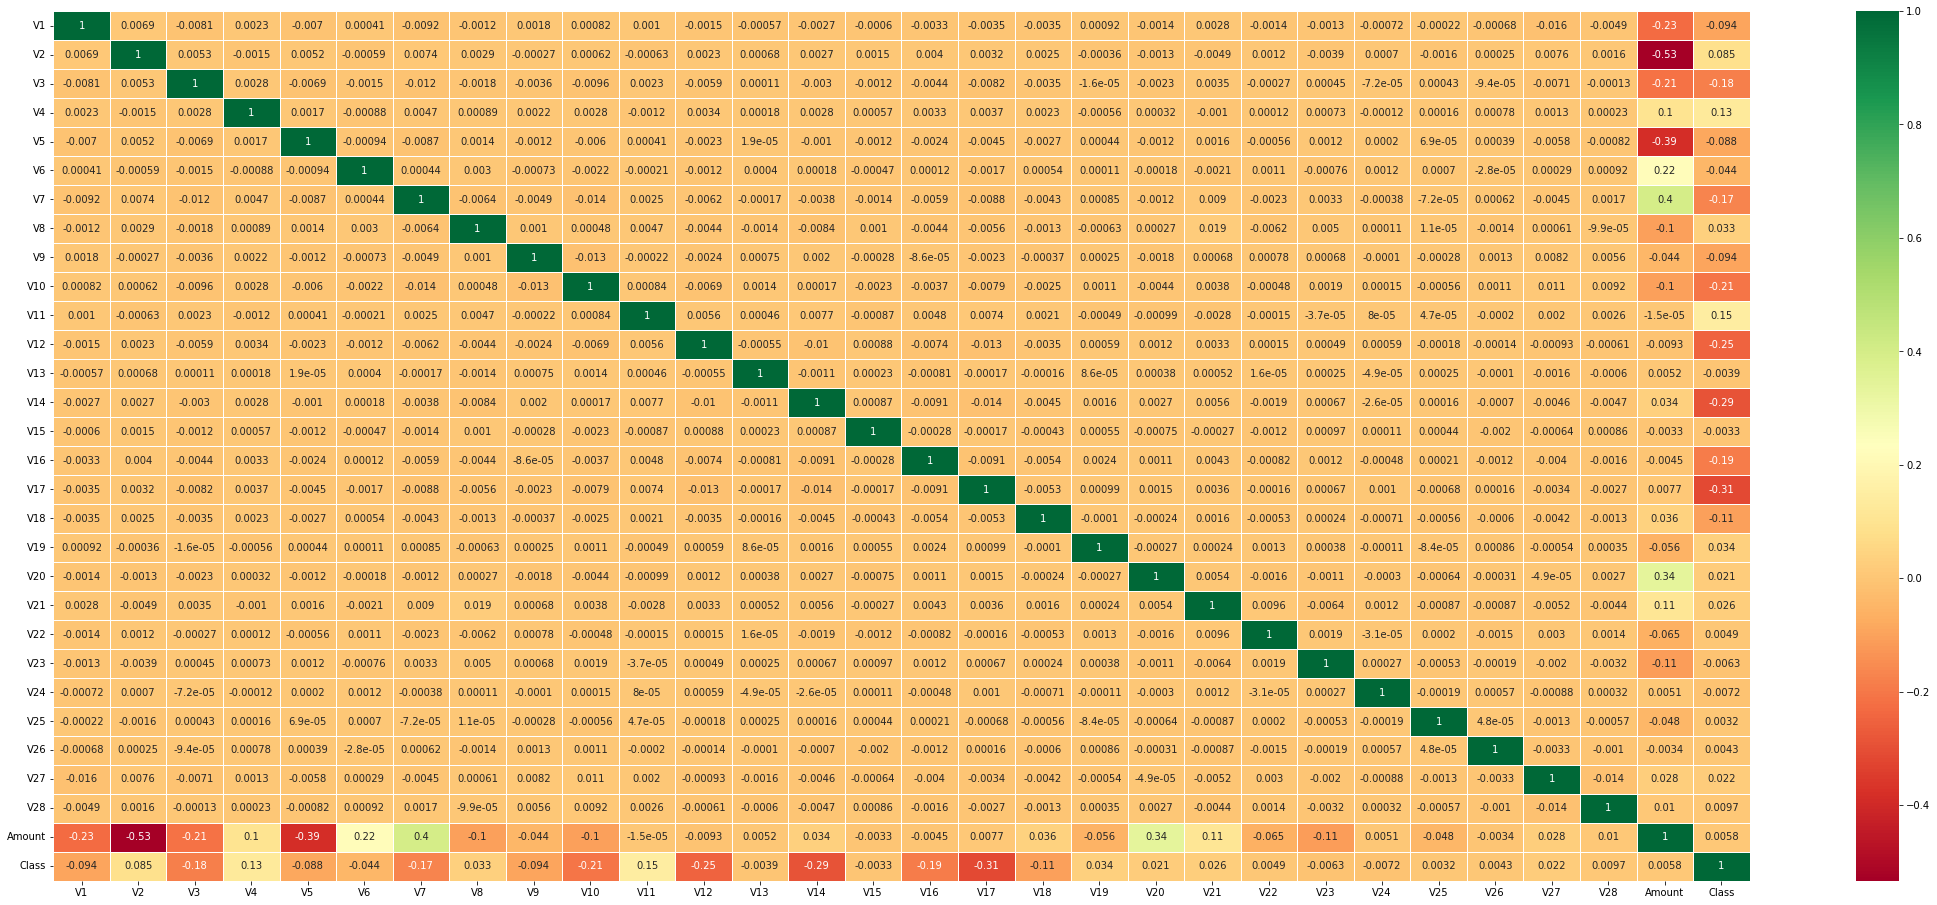

In [16]:
# It is common practice to observe the dependency between the features and the target variable
# A very important and meaningful visualization is called heatmap
plt.figure(figsize=(38, 16))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.5)
plt.savefig('heatmap.png')
plt.show()

In [17]:
# Building the model
model = LogisticRegression()

In [18]:
# Training the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# Evaluating the model
train_acc = model.score(X_train_scaled, y_train)
print('Accuracy of the model on the training set: {:.2f}'.format(train_acc*100))

Accuracy of the model on the training set: 99.93


In [21]:
# Evaluating the model on the test set and generating classification report
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.65      0.73        95

    accuracy                           1.00     56746
   macro avg       0.92      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746



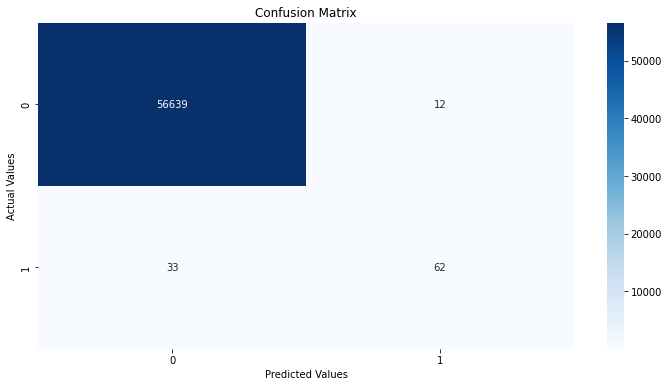

In [22]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix.png')